In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/__init__.py:42: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  warnings.warn("Starting from version 2.2.1, the library file in distribution wheels for macOS "


In [2]:
data = pd.read_csv("match_total.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (933,934,976,977) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21374 entries, 0 to 21373
Columns: 1019 entries, country_id to away_team_id_defenceDefenderLineClass_Offside Trap
dtypes: float64(962), int64(30), object(27)
memory usage: 166.2+ MB


In [4]:
# drop columns that are all NaNs
data = data.dropna(axis=1, how='all')

In [5]:
y = (1.0*((data["home_team_goal"] - data["away_team_goal"]) > 0)).values

In [6]:
drop_columns = ["home_team_goal", "away_team_goal"]
for column in data.columns:
    if data[column].dtype == "object":
        drop_columns.append(column)

In [7]:
drop_columns

['home_team_goal',
 'away_team_goal',
 'date',
 'home_player_1_player_name',
 'home_player_2_player_name',
 'home_player_3_player_name',
 'home_player_4_player_name',
 'home_player_5_player_name',
 'home_player_6_player_name',
 'home_player_7_player_name',
 'home_player_8_player_name',
 'home_player_9_player_name',
 'home_player_10_player_name',
 'home_player_11_player_name',
 'away_player_1_player_name',
 'away_player_2_player_name',
 'away_player_3_player_name',
 'away_player_4_player_name',
 'away_player_5_player_name',
 'away_player_6_player_name',
 'away_player_7_player_name',
 'away_player_8_player_name',
 'away_player_9_player_name',
 'away_player_10_player_name',
 'away_player_11_player_name',
 'home_team_id_team_long_name',
 'home_team_id_team_short_name',
 'away_team_id_team_long_name',
 'away_team_id_team_short_name']

In [8]:
x_values = data.drop(columns=drop_columns)

In [13]:
from sklearn.metrics import accuracy_score

x_train_gbm, x_val_gbm, y_train_gbm, y_val_gbm = train_test_split(x_values, y, train_size=0.85, random_state=1)
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'max_depth': 100,
    'seed': 1
}
lgb_train = lgb.Dataset(x_train_gbm, y_train_gbm, feature_name=list(x_values.columns))
lgb_eval = lgb.Dataset(x_val_gbm, y_val_gbm, feature_name=list(x_values.columns))
model2 = lgb.train(params, lgb_train, num_boost_round=10000, valid_sets=[lgb_train, lgb_eval], 
                valid_names=["train", "eval"], early_stopping_rounds=1500, verbose_eval=True)
y_pred_train = (model2.predict(x_values, num_iteration=model2.best_iteration) > 0.5)*1.0
acc_lgb_train = accuracy_score(y, y_pred_train)

print("Accuracy in train set is: " + str(round(acc_lgb_train, 4)))

[1]	train's binary_logloss: 0.688811	eval's binary_logloss: 0.68835
Training until validation scores don't improve for 1500 rounds
[2]	train's binary_logloss: 0.68777	eval's binary_logloss: 0.687588
[3]	train's binary_logloss: 0.686719	eval's binary_logloss: 0.686846
[4]	train's binary_logloss: 0.685661	eval's binary_logloss: 0.686125
[5]	train's binary_logloss: 0.684626	eval's binary_logloss: 0.685449
[6]	train's binary_logloss: 0.683586	eval's binary_logloss: 0.684771
[7]	train's binary_logloss: 0.682585	eval's binary_logloss: 0.684027
[8]	train's binary_logloss: 0.681596	eval's binary_logloss: 0.683306
[9]	train's binary_logloss: 0.6806	eval's binary_logloss: 0.682635
[10]	train's binary_logloss: 0.679623	eval's binary_logloss: 0.682001
[11]	train's binary_logloss: 0.678663	eval's binary_logloss: 0.681421
[12]	train's binary_logloss: 0.677732	eval's binary_logloss: 0.680875
[13]	train's binary_logloss: 0.676798	eval's binary_logloss: 0.680279
[14]	train's binary_logloss: 0.675869	ev

[121]	train's binary_logloss: 0.611833	eval's binary_logloss: 0.646009
[122]	train's binary_logloss: 0.611429	eval's binary_logloss: 0.645889
[123]	train's binary_logloss: 0.611036	eval's binary_logloss: 0.645673
[124]	train's binary_logloss: 0.610636	eval's binary_logloss: 0.645587
[125]	train's binary_logloss: 0.610245	eval's binary_logloss: 0.645453
[126]	train's binary_logloss: 0.609838	eval's binary_logloss: 0.645299
[127]	train's binary_logloss: 0.60945	eval's binary_logloss: 0.645173
[128]	train's binary_logloss: 0.609047	eval's binary_logloss: 0.645045
[129]	train's binary_logloss: 0.60865	eval's binary_logloss: 0.644927
[130]	train's binary_logloss: 0.608261	eval's binary_logloss: 0.644762
[131]	train's binary_logloss: 0.607876	eval's binary_logloss: 0.644661
[132]	train's binary_logloss: 0.607492	eval's binary_logloss: 0.644545
[133]	train's binary_logloss: 0.607107	eval's binary_logloss: 0.644426
[134]	train's binary_logloss: 0.606731	eval's binary_logloss: 0.644306
[135]	tr

[242]	train's binary_logloss: 0.57294	eval's binary_logloss: 0.636754
[243]	train's binary_logloss: 0.572678	eval's binary_logloss: 0.636748
[244]	train's binary_logloss: 0.57241	eval's binary_logloss: 0.636717
[245]	train's binary_logloss: 0.572147	eval's binary_logloss: 0.636682
[246]	train's binary_logloss: 0.571881	eval's binary_logloss: 0.636651
[247]	train's binary_logloss: 0.571613	eval's binary_logloss: 0.636635
[248]	train's binary_logloss: 0.571349	eval's binary_logloss: 0.636612
[249]	train's binary_logloss: 0.571074	eval's binary_logloss: 0.636597
[250]	train's binary_logloss: 0.570826	eval's binary_logloss: 0.6366
[251]	train's binary_logloss: 0.570575	eval's binary_logloss: 0.636567
[252]	train's binary_logloss: 0.570314	eval's binary_logloss: 0.636558
[253]	train's binary_logloss: 0.570059	eval's binary_logloss: 0.636528
[254]	train's binary_logloss: 0.569797	eval's binary_logloss: 0.63649
[255]	train's binary_logloss: 0.569542	eval's binary_logloss: 0.636477
[256]	train

[359]	train's binary_logloss: 0.544789	eval's binary_logloss: 0.635205
[360]	train's binary_logloss: 0.544566	eval's binary_logloss: 0.635214
[361]	train's binary_logloss: 0.544346	eval's binary_logloss: 0.635207
[362]	train's binary_logloss: 0.544118	eval's binary_logloss: 0.635191
[363]	train's binary_logloss: 0.543899	eval's binary_logloss: 0.635219
[364]	train's binary_logloss: 0.543687	eval's binary_logloss: 0.635204
[365]	train's binary_logloss: 0.543472	eval's binary_logloss: 0.635203
[366]	train's binary_logloss: 0.543256	eval's binary_logloss: 0.635238
[367]	train's binary_logloss: 0.543045	eval's binary_logloss: 0.635236
[368]	train's binary_logloss: 0.542818	eval's binary_logloss: 0.635253
[369]	train's binary_logloss: 0.542603	eval's binary_logloss: 0.635293
[370]	train's binary_logloss: 0.542388	eval's binary_logloss: 0.635274
[371]	train's binary_logloss: 0.542171	eval's binary_logloss: 0.63531
[372]	train's binary_logloss: 0.541951	eval's binary_logloss: 0.6353
[373]	tra

[475]	train's binary_logloss: 0.521058	eval's binary_logloss: 0.634901
[476]	train's binary_logloss: 0.52088	eval's binary_logloss: 0.634937
[477]	train's binary_logloss: 0.52069	eval's binary_logloss: 0.634963
[478]	train's binary_logloss: 0.520495	eval's binary_logloss: 0.634998
[479]	train's binary_logloss: 0.520296	eval's binary_logloss: 0.63501
[480]	train's binary_logloss: 0.520099	eval's binary_logloss: 0.635063
[481]	train's binary_logloss: 0.519926	eval's binary_logloss: 0.635015
[482]	train's binary_logloss: 0.519746	eval's binary_logloss: 0.634979
[483]	train's binary_logloss: 0.519559	eval's binary_logloss: 0.634986
[484]	train's binary_logloss: 0.51937	eval's binary_logloss: 0.634977
[485]	train's binary_logloss: 0.519205	eval's binary_logloss: 0.634981
[486]	train's binary_logloss: 0.519015	eval's binary_logloss: 0.635014
[487]	train's binary_logloss: 0.518804	eval's binary_logloss: 0.635019
[488]	train's binary_logloss: 0.518624	eval's binary_logloss: 0.635065
[489]	trai

[596]	train's binary_logloss: 0.499147	eval's binary_logloss: 0.634724
[597]	train's binary_logloss: 0.498995	eval's binary_logloss: 0.634741
[598]	train's binary_logloss: 0.498832	eval's binary_logloss: 0.634767
[599]	train's binary_logloss: 0.498668	eval's binary_logloss: 0.634765
[600]	train's binary_logloss: 0.498521	eval's binary_logloss: 0.63474
[601]	train's binary_logloss: 0.498342	eval's binary_logloss: 0.634701
[602]	train's binary_logloss: 0.498166	eval's binary_logloss: 0.634672
[603]	train's binary_logloss: 0.498003	eval's binary_logloss: 0.634674
[604]	train's binary_logloss: 0.497827	eval's binary_logloss: 0.634647
[605]	train's binary_logloss: 0.497656	eval's binary_logloss: 0.634632
[606]	train's binary_logloss: 0.497509	eval's binary_logloss: 0.634578
[607]	train's binary_logloss: 0.497363	eval's binary_logloss: 0.634602
[608]	train's binary_logloss: 0.497194	eval's binary_logloss: 0.634634
[609]	train's binary_logloss: 0.49706	eval's binary_logloss: 0.634629
[610]	tr

[716]	train's binary_logloss: 0.479378	eval's binary_logloss: 0.635487
[717]	train's binary_logloss: 0.479192	eval's binary_logloss: 0.635482
[718]	train's binary_logloss: 0.479004	eval's binary_logloss: 0.635467
[719]	train's binary_logloss: 0.478816	eval's binary_logloss: 0.635474
[720]	train's binary_logloss: 0.478637	eval's binary_logloss: 0.635484
[721]	train's binary_logloss: 0.478474	eval's binary_logloss: 0.635491
[722]	train's binary_logloss: 0.478315	eval's binary_logloss: 0.635512
[723]	train's binary_logloss: 0.478157	eval's binary_logloss: 0.635514
[724]	train's binary_logloss: 0.478001	eval's binary_logloss: 0.635516
[725]	train's binary_logloss: 0.477846	eval's binary_logloss: 0.635504
[726]	train's binary_logloss: 0.477686	eval's binary_logloss: 0.635465
[727]	train's binary_logloss: 0.47754	eval's binary_logloss: 0.635476
[728]	train's binary_logloss: 0.477368	eval's binary_logloss: 0.635437
[729]	train's binary_logloss: 0.477237	eval's binary_logloss: 0.635451
[730]	t

[832]	train's binary_logloss: 0.460879	eval's binary_logloss: 0.635343
[833]	train's binary_logloss: 0.460739	eval's binary_logloss: 0.635358
[834]	train's binary_logloss: 0.460585	eval's binary_logloss: 0.635359
[835]	train's binary_logloss: 0.460406	eval's binary_logloss: 0.63537
[836]	train's binary_logloss: 0.460237	eval's binary_logloss: 0.635383
[837]	train's binary_logloss: 0.460069	eval's binary_logloss: 0.635422
[838]	train's binary_logloss: 0.459909	eval's binary_logloss: 0.635464
[839]	train's binary_logloss: 0.459763	eval's binary_logloss: 0.635462
[840]	train's binary_logloss: 0.459607	eval's binary_logloss: 0.635429
[841]	train's binary_logloss: 0.459454	eval's binary_logloss: 0.635419
[842]	train's binary_logloss: 0.459335	eval's binary_logloss: 0.635436
[843]	train's binary_logloss: 0.459172	eval's binary_logloss: 0.635429
[844]	train's binary_logloss: 0.459009	eval's binary_logloss: 0.63544
[845]	train's binary_logloss: 0.45886	eval's binary_logloss: 0.635415
[846]	tra

[953]	train's binary_logloss: 0.442873	eval's binary_logloss: 0.635311
[954]	train's binary_logloss: 0.442735	eval's binary_logloss: 0.635303
[955]	train's binary_logloss: 0.442582	eval's binary_logloss: 0.635285
[956]	train's binary_logloss: 0.442453	eval's binary_logloss: 0.635307
[957]	train's binary_logloss: 0.442323	eval's binary_logloss: 0.635298
[958]	train's binary_logloss: 0.442189	eval's binary_logloss: 0.635294
[959]	train's binary_logloss: 0.442049	eval's binary_logloss: 0.635303
[960]	train's binary_logloss: 0.441923	eval's binary_logloss: 0.635319
[961]	train's binary_logloss: 0.441778	eval's binary_logloss: 0.635299
[962]	train's binary_logloss: 0.44163	eval's binary_logloss: 0.635295
[963]	train's binary_logloss: 0.441484	eval's binary_logloss: 0.6353
[964]	train's binary_logloss: 0.441326	eval's binary_logloss: 0.635281
[965]	train's binary_logloss: 0.441195	eval's binary_logloss: 0.635283
[966]	train's binary_logloss: 0.441044	eval's binary_logloss: 0.635302
[967]	tra

[1070]	train's binary_logloss: 0.42649	eval's binary_logloss: 0.636175
[1071]	train's binary_logloss: 0.426336	eval's binary_logloss: 0.63623
[1072]	train's binary_logloss: 0.426189	eval's binary_logloss: 0.636257
[1073]	train's binary_logloss: 0.426056	eval's binary_logloss: 0.636288
[1074]	train's binary_logloss: 0.425901	eval's binary_logloss: 0.636287
[1075]	train's binary_logloss: 0.425759	eval's binary_logloss: 0.636302
[1076]	train's binary_logloss: 0.42563	eval's binary_logloss: 0.636317
[1077]	train's binary_logloss: 0.425501	eval's binary_logloss: 0.636327
[1078]	train's binary_logloss: 0.425373	eval's binary_logloss: 0.636368
[1079]	train's binary_logloss: 0.425251	eval's binary_logloss: 0.636389
[1080]	train's binary_logloss: 0.425122	eval's binary_logloss: 0.636402
[1081]	train's binary_logloss: 0.424988	eval's binary_logloss: 0.636398
[1082]	train's binary_logloss: 0.424864	eval's binary_logloss: 0.636398
[1083]	train's binary_logloss: 0.424743	eval's binary_logloss: 0.63

[1189]	train's binary_logloss: 0.41092	eval's binary_logloss: 0.63718
[1190]	train's binary_logloss: 0.410775	eval's binary_logloss: 0.637231
[1191]	train's binary_logloss: 0.41065	eval's binary_logloss: 0.637268
[1192]	train's binary_logloss: 0.410524	eval's binary_logloss: 0.637298
[1193]	train's binary_logloss: 0.410401	eval's binary_logloss: 0.637313
[1194]	train's binary_logloss: 0.410281	eval's binary_logloss: 0.637341
[1195]	train's binary_logloss: 0.410162	eval's binary_logloss: 0.637371
[1196]	train's binary_logloss: 0.410047	eval's binary_logloss: 0.63738
[1197]	train's binary_logloss: 0.409945	eval's binary_logloss: 0.637402
[1198]	train's binary_logloss: 0.409819	eval's binary_logloss: 0.637418
[1199]	train's binary_logloss: 0.409703	eval's binary_logloss: 0.637426
[1200]	train's binary_logloss: 0.40959	eval's binary_logloss: 0.637456
[1201]	train's binary_logloss: 0.409451	eval's binary_logloss: 0.63747
[1202]	train's binary_logloss: 0.409322	eval's binary_logloss: 0.63747

[1304]	train's binary_logloss: 0.396793	eval's binary_logloss: 0.637872
[1305]	train's binary_logloss: 0.396671	eval's binary_logloss: 0.637835
[1306]	train's binary_logloss: 0.396542	eval's binary_logloss: 0.637822
[1307]	train's binary_logloss: 0.396412	eval's binary_logloss: 0.637813
[1308]	train's binary_logloss: 0.396281	eval's binary_logloss: 0.637789
[1309]	train's binary_logloss: 0.396151	eval's binary_logloss: 0.63784
[1310]	train's binary_logloss: 0.39604	eval's binary_logloss: 0.637832
[1311]	train's binary_logloss: 0.395928	eval's binary_logloss: 0.637815
[1312]	train's binary_logloss: 0.39582	eval's binary_logloss: 0.637842
[1313]	train's binary_logloss: 0.395708	eval's binary_logloss: 0.637873
[1314]	train's binary_logloss: 0.395587	eval's binary_logloss: 0.637882
[1315]	train's binary_logloss: 0.395446	eval's binary_logloss: 0.637887
[1316]	train's binary_logloss: 0.395323	eval's binary_logloss: 0.637901
[1317]	train's binary_logloss: 0.395188	eval's binary_logloss: 0.63

[1421]	train's binary_logloss: 0.382788	eval's binary_logloss: 0.638309
[1422]	train's binary_logloss: 0.382669	eval's binary_logloss: 0.638326
[1423]	train's binary_logloss: 0.382543	eval's binary_logloss: 0.638336
[1424]	train's binary_logloss: 0.382415	eval's binary_logloss: 0.638342
[1425]	train's binary_logloss: 0.382288	eval's binary_logloss: 0.638363
[1426]	train's binary_logloss: 0.382192	eval's binary_logloss: 0.638386
[1427]	train's binary_logloss: 0.382096	eval's binary_logloss: 0.638385
[1428]	train's binary_logloss: 0.381996	eval's binary_logloss: 0.638427
[1429]	train's binary_logloss: 0.381875	eval's binary_logloss: 0.638406
[1430]	train's binary_logloss: 0.381747	eval's binary_logloss: 0.638375
[1431]	train's binary_logloss: 0.381635	eval's binary_logloss: 0.63837
[1432]	train's binary_logloss: 0.381516	eval's binary_logloss: 0.638337
[1433]	train's binary_logloss: 0.381383	eval's binary_logloss: 0.638358
[1434]	train's binary_logloss: 0.381273	eval's binary_logloss: 0.

[1538]	train's binary_logloss: 0.369542	eval's binary_logloss: 0.639308
[1539]	train's binary_logloss: 0.369434	eval's binary_logloss: 0.639317
[1540]	train's binary_logloss: 0.369333	eval's binary_logloss: 0.639305
[1541]	train's binary_logloss: 0.369222	eval's binary_logloss: 0.639337
[1542]	train's binary_logloss: 0.369124	eval's binary_logloss: 0.639313
[1543]	train's binary_logloss: 0.369014	eval's binary_logloss: 0.639332
[1544]	train's binary_logloss: 0.368903	eval's binary_logloss: 0.639333
[1545]	train's binary_logloss: 0.368796	eval's binary_logloss: 0.63938
[1546]	train's binary_logloss: 0.368671	eval's binary_logloss: 0.639392
[1547]	train's binary_logloss: 0.368539	eval's binary_logloss: 0.639404
[1548]	train's binary_logloss: 0.368415	eval's binary_logloss: 0.639426
[1549]	train's binary_logloss: 0.368285	eval's binary_logloss: 0.639445
[1550]	train's binary_logloss: 0.368161	eval's binary_logloss: 0.639461
[1551]	train's binary_logloss: 0.368043	eval's binary_logloss: 0.

[1661]	train's binary_logloss: 0.356243	eval's binary_logloss: 0.640102
[1662]	train's binary_logloss: 0.356124	eval's binary_logloss: 0.640095
[1663]	train's binary_logloss: 0.356008	eval's binary_logloss: 0.64014
[1664]	train's binary_logloss: 0.355889	eval's binary_logloss: 0.640174
[1665]	train's binary_logloss: 0.355777	eval's binary_logloss: 0.64017
[1666]	train's binary_logloss: 0.355671	eval's binary_logloss: 0.640138
[1667]	train's binary_logloss: 0.35558	eval's binary_logloss: 0.640111
[1668]	train's binary_logloss: 0.355474	eval's binary_logloss: 0.640074
[1669]	train's binary_logloss: 0.355383	eval's binary_logloss: 0.640088
[1670]	train's binary_logloss: 0.355293	eval's binary_logloss: 0.640058
[1671]	train's binary_logloss: 0.355177	eval's binary_logloss: 0.64004
[1672]	train's binary_logloss: 0.355068	eval's binary_logloss: 0.64003
[1673]	train's binary_logloss: 0.354977	eval's binary_logloss: 0.640024
[1674]	train's binary_logloss: 0.354859	eval's binary_logloss: 0.6400

[1780]	train's binary_logloss: 0.343876	eval's binary_logloss: 0.640508
[1781]	train's binary_logloss: 0.343778	eval's binary_logloss: 0.640545
[1782]	train's binary_logloss: 0.343675	eval's binary_logloss: 0.640551
[1783]	train's binary_logloss: 0.343576	eval's binary_logloss: 0.640556
[1784]	train's binary_logloss: 0.34348	eval's binary_logloss: 0.640551
[1785]	train's binary_logloss: 0.343389	eval's binary_logloss: 0.640568
[1786]	train's binary_logloss: 0.343298	eval's binary_logloss: 0.640562
[1787]	train's binary_logloss: 0.343173	eval's binary_logloss: 0.640584
[1788]	train's binary_logloss: 0.343048	eval's binary_logloss: 0.64059
[1789]	train's binary_logloss: 0.342933	eval's binary_logloss: 0.640607
[1790]	train's binary_logloss: 0.342822	eval's binary_logloss: 0.640625
[1791]	train's binary_logloss: 0.34271	eval's binary_logloss: 0.640632
[1792]	train's binary_logloss: 0.342599	eval's binary_logloss: 0.640635
[1793]	train's binary_logloss: 0.342493	eval's binary_logloss: 0.64

[1898]	train's binary_logloss: 0.332043	eval's binary_logloss: 0.641327
[1899]	train's binary_logloss: 0.331939	eval's binary_logloss: 0.641303
[1900]	train's binary_logloss: 0.331841	eval's binary_logloss: 0.641261
[1901]	train's binary_logloss: 0.331753	eval's binary_logloss: 0.641294
[1902]	train's binary_logloss: 0.331669	eval's binary_logloss: 0.64131
[1903]	train's binary_logloss: 0.331584	eval's binary_logloss: 0.641333
[1904]	train's binary_logloss: 0.331511	eval's binary_logloss: 0.641353
[1905]	train's binary_logloss: 0.331428	eval's binary_logloss: 0.641396
[1906]	train's binary_logloss: 0.331325	eval's binary_logloss: 0.641408
[1907]	train's binary_logloss: 0.331231	eval's binary_logloss: 0.6414
[1908]	train's binary_logloss: 0.331125	eval's binary_logloss: 0.641414
[1909]	train's binary_logloss: 0.331023	eval's binary_logloss: 0.64143
[1910]	train's binary_logloss: 0.330933	eval's binary_logloss: 0.641412
[1911]	train's binary_logloss: 0.33085	eval's binary_logloss: 0.6413

[2014]	train's binary_logloss: 0.320879	eval's binary_logloss: 0.64183
[2015]	train's binary_logloss: 0.32079	eval's binary_logloss: 0.641823
[2016]	train's binary_logloss: 0.320701	eval's binary_logloss: 0.641807
[2017]	train's binary_logloss: 0.320613	eval's binary_logloss: 0.64181
[2018]	train's binary_logloss: 0.320529	eval's binary_logloss: 0.641858
[2019]	train's binary_logloss: 0.320446	eval's binary_logloss: 0.641901
[2020]	train's binary_logloss: 0.320354	eval's binary_logloss: 0.641933
[2021]	train's binary_logloss: 0.320261	eval's binary_logloss: 0.64195
[2022]	train's binary_logloss: 0.320169	eval's binary_logloss: 0.641953
[2023]	train's binary_logloss: 0.320072	eval's binary_logloss: 0.64198
[2024]	train's binary_logloss: 0.319982	eval's binary_logloss: 0.641984
[2025]	train's binary_logloss: 0.319881	eval's binary_logloss: 0.642039
[2026]	train's binary_logloss: 0.319792	eval's binary_logloss: 0.642078
[2027]	train's binary_logloss: 0.319715	eval's binary_logloss: 0.6421

In [14]:
import shap
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(x_values)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


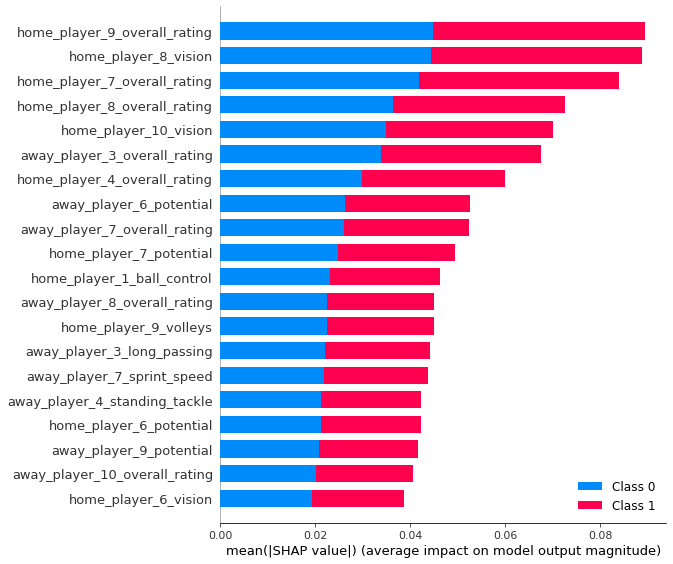

In [15]:
shap.summary_plot(shap_values, x_values, plot_type="bar", feature_names=x_values.columns)

In [13]:
## feature有点多跑的有点慢
#shap_interaction_values = shap.TreeExplainer(model2).shap_interaction_values(x_values)

In [14]:
#shap.summary_plot(shap_interaction_values,x_values,feature_names=x_values.columns)

In [15]:
#shap.dependence_plot("home_player_6_potential", shap_values, x_values, interaction_index="home_player_7_potential",feature_names=x_values.columns)

In [19]:
mean_shap_feature_values = pd.DataFrame(shap_values[0], columns=x_values.columns).abs().mean(axis=0).sort_values(ascending=False)

In [20]:
mean_shap_feature_values.to_csv("feature_importance.csv")

In [21]:
top_40_var = list(mean_shap_feature_values.index)[:40]
x_train = x_values[top_40_var]

In [22]:
top_40_var

['home_player_9_overall_rating',
 'home_player_8_vision',
 'home_player_7_overall_rating',
 'home_player_8_overall_rating',
 'home_player_10_vision',
 'away_player_3_overall_rating',
 'home_player_4_overall_rating',
 'away_player_6_potential',
 'away_player_7_overall_rating',
 'home_player_7_potential',
 'home_player_1_ball_control',
 'away_player_8_overall_rating',
 'home_player_9_volleys',
 'away_player_3_long_passing',
 'away_player_7_sprint_speed',
 'away_player_4_standing_tackle',
 'home_player_6_potential',
 'away_player_9_potential',
 'away_player_10_overall_rating',
 'home_player_6_vision',
 'home_player_8_ball_control',
 'home_player_4_ball_control',
 'away_player_10_potential',
 'away_player_3_interceptions',
 'home_player_4_sliding_tackle',
 'home_player_6_overall_rating',
 'home_player_11_vision',
 'away_player_2_overall_rating',
 'away_player_4_potential',
 'away_player_5_potential',
 'away_player_8_reactions',
 'home_player_6_curve',
 'home_player_11_potential',
 'home_pl